# WCZYTYWANIE DANYCH:
#### W tej części wczytane zostaną wszystkie dane potrzebne do analizy zmiennych objaśnianej i objaśniających.

In [253]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import matplotlib.pyplot as plt

##ZMIENNA OBJAŚNIANA - Global Cybersecurity Index - Wskaźnik cyberbezpieczeństwa

In [254]:
df_gci=pd.read_csv('/content/BAZA DANYCH MODEL - ITU_GCI.csv')

#Zmienne objaśniające:
#### E-Goverment Index - wskaźnik cyfryzacji rządowej
#### Corruption Perception Index
#### Press Freedom Index - Wskaźnik wolności prasy
#### GDP per capita - PKB per capita
#### Political Stability and Absence of Violence Terrorism Percentile Rank
#### Urban populaton (% of total population)
#### Trade (% of GDP)
#### Foreign direct investment, net inflows (% of GDP)
####  Unemployment, total (% of total labor force.csv

In [255]:
df_egov=pd.read_csv('/content/BAZA DANYCH MODEL - EGOV_DATA_2024.csv')

In [256]:
df_cpi=pd.read_csv('/content/BAZA DANYCH MODEL - CPI2024-corruption perception index.csv')

In [257]:
df_pfi=pd.read_csv('/content/BAZA DANYCH MODEL - Press Freedom Index.csv')

In [258]:
df_psaa=pd.read_csv('/content/BAZA DANYCH MODEL - Political Stability and Absence of ViolenceTerrorism Percentile Rank.csv',skiprows=4)

In [259]:
df_trade=pd.read_csv('/content/BAZA DANYCH MODEL - Trade.csv',skiprows=4)

In [260]:
df_urban=pd.read_csv('/content/BAZA DANYCH MODEL - Urban population (% of total population.csv',skiprows=4)

In [261]:
df_unemploy=pd.read_csv('/content/BAZA DANYCH MODEL - Unemployment, total (% of total labor force.csv',skiprows=4)

In [262]:
df_foreign=pd.read_csv('/content/BAZA DANYCH MODEL - Foreign direct investment, net inflows (% of GDP.csv',skiprows=4)

In [263]:
missings_cpi=df_cpi.isna()
missings_cpi.sum()

,0
Country / Territory,0
Country Code,0
Region,0
CPI 2024 score,0
Rank,0
standard error 2024,0
Number of sources,0
Lower CI,0
Upper CI,0
African Development Bank CPIA,126


In [264]:
missings_egov=df_egov.isna()
missings_egov.sum()

,0
Survey Year,0
Country Name,0
E-Government Rank,0
E-Government Index,0
E-Participation Index,0
Online Service Index,0
Human Capital Index,0
Telecommunication Infrastructure Index,0


In [265]:
missings_pfi=df_pfi.isna()
missings_pfi.sum()

,0
ISO,0
Score,0
Rank,0
Political Context,0
Rank_Pol,0
Economic Context,0
Rank_Eco,0
Legal Context,0
Rank_Leg,0
Social Context,0


In [266]:
df_gci.head()

,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,SEX,...,UNIT_MULT,UNIT_MULT_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,TIME_FORMAT,TIME_FORMAT_LABEL,OBS_STATUS,OBS_STATUS_LABEL,OBS_CONF,OBS_CONF_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,AFG,Afghanistan,ITU_GCI_CDS_CYB_PROF_TRAIN,Training for Cybersecurity Professionals - CDS...,_T,...,0,Units,IX,Index,602,CCYY,A,Normal value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,ALB,Albania,ITU_GCI_CDS_CYB_PROF_TRAIN,Training for Cybersecurity Professionals - CDS...,_T,...,0,Units,IX,Index,602,CCYY,A,Normal value,PU,Public
2,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,DZA,Algeria,ITU_GCI_CDS_CYB_PROF_TRAIN,Training for Cybersecurity Professionals - CDS...,_T,...,0,Units,IX,Index,602,CCYY,A,Normal value,PU,Public
3,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,AND,Andorra,ITU_GCI_CDS_CYB_PROF_TRAIN,Training for Cybersecurity Professionals - CDS...,_T,...,0,Units,IX,Index,602,CCYY,A,Normal value,PU,Public
4,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,AGO,Angola,ITU_GCI_CDS_CYB_PROF_TRAIN,Training for Cybersecurity Professionals - CDS...,_T,...,0,Units,IX,Index,602,CCYY,A,Normal value,PU,Public


In [267]:
missings_psaa=df_psaa.isna()
missings_psaa.sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,266
...,...
2020,61
2021,61
2022,61
2023,61


In [268]:
missings_trade=df_trade.isna()
missings_trade.sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,185
...,...
2020,41
2021,42
2022,42
2023,51


In [269]:
missings_urban=df_urban.isna()
missings_urban.sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,1
...,...
2020,1
2021,1
2022,1
2023,1


In [270]:
missings_unemploy=df_unemploy.isna()
missings_unemploy.sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,266
...,...
2020,31
2021,31
2022,32
2023,34


In [271]:
missings_foreign=df_foreign.isna()
missings_foreign.sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,266
...,...
2020,21
2021,20
2022,20
2023,20


#Przygotowywanie df poszczególnych zmiennych do konwersji w jedną ramkę danych


In [272]:
#przygotowanie ramki zmiennej objaśnianej - indeksu cyberbezpieczenstwa
df_gci = df_gci.rename(columns={
    'REF_AREA_LABEL': 'Kraj',
    'OBS_VALUE': 'Wskaznik_cyberbezpieczenstwa','REF_AREA':'Kod_Kraju'
})


In [273]:
gci_filtered = df_gci[
    (df_gci['INDICATOR_LABEL'] == 'Global Cybersecurity Index - Overall Score (ITU GCI)') &
    (df_gci['TIME_PERIOD'] == 2024)
].copy()

gci_filtered = gci_filtered[['Kraj', 'Wskaznik_cyberbezpieczenstwa','Kod_Kraju']]
gci_filtered.head()

,Kraj,Wskaznik_cyberbezpieczenstwa,Kod_Kraju
5238,Afghanistan,18.418647,AFG
5239,Albania,86.506338,ALB
5240,Algeria,66.023846,DZA
5241,Andorra,76.495053,AND
5242,Angola,39.635885,AGO


In [274]:
#przygotowanie ramki zmiennej objaśniającej EGOV
df_egov=df_egov.rename(columns={'Country Name':'Kraj'})

In [275]:

egov_filtered=df_egov[['Kraj','E-Government Index']]

In [276]:
#W bazie zmiennych związanych z e-gov nie ma wyznaczonego kodu kraju po którym planuję łączyć ramki danych, w związku z czym korzystam z country_conventer
!pip install country_converter

import country_converter as coco

# Tworzymy nową kolumnę Kod_Kraju
egov_filtered['Kod_Kraju'] = coco.convert(egov_filtered['Kraj'], to='ISO3', not_found=None)
print(egov_filtered[['Kraj', 'Kod_Kraju']].head())


       Kraj Kod_Kraju
0     Iraq        IRQ
1  Ireland        IRL
2   Israel        ISR
3    Italy        ITA
4  Jamaica        JAM


/tmp/ipython-input-1890740743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egov_filtered['Kod_Kraju'] = coco.convert(egov_filtered['Kraj'], to='ISO3', not_found=None)


In [277]:
manual_iso = {
    "Congo, Democratic Republic of the": "COD",
    "Congo, Republic of the": "COG",
    # dodaj inne brakujące kraje jeśli trzeba
}

egov_filtered['Kod_Kraju'] = egov_filtered.apply(
    lambda row: manual_iso.get(row['Kraj'], row['Kod_Kraju']),
    axis=1
)


/tmp/ipython-input-2640793510.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egov_filtered['Kod_Kraju'] = egov_filtered.apply(


In [278]:
# Zakładamy, że kolumna ISO3 już istnieje
missing_iso = egov_filtered[egov_filtered['Kod_Kraju'].isna()]

# Wyświetlamy kraje, które nie mają ISO3
print(missing_iso[['Kraj', 'Kod_Kraju']])
egov_filtered.head()



Empty DataFrame
Columns: [Kraj, Kod_Kraju]
Index: []


,Kraj,E-Government Index,Kod_Kraju
0,Iraq,0.45721,IRQ
1,Ireland,0.91377,IRL
2,Israel,0.90143,ISR
3,Italy,0.83557,ITA
4,Jamaica,0.66777,JAM


In [279]:

# Apply country converter to df_egov
df_egov['Kod_Kraju'] = coco.convert(df_egov['Kraj'], to='ISO3', not_found=None)

# Apply manual fixes for missing countries (if any)
manual_iso = {
    "Congo, Democratic Republic of the": "COD",
    "Congo, Republic of the": "COG",
    # dodaj inne brakujące kraje jeśli trzeba
}
df_egov['Kod_Kraju'] = df_egov.apply(
    lambda row: manual_iso.get(row['Kraj'], row['Kod_Kraju']),
    axis=1
)

egov_filtered=df_egov[['Kod_Kraju','E-Government Index']]

In [280]:
egov_filtered.head()

,Kod_Kraju,E-Government Index
0,IRQ,0.45721
1,IRL,0.91377
2,ISR,0.90143
3,ITA,0.83557
4,JAM,0.66777


In [281]:
#przygotowanie ramki zmiennej objaśniającej CPI
df_cpi=df_cpi.rename(columns={'CPI 2024 score':'CPI_2024','Country Code':'Kod_Kraju'})


In [282]:
cpi_filtered=df_cpi[['CPI_2024','Kod_Kraju']]
cpi_filtered.head()

,CPI_2024,Kod_Kraju
0,90,DNK
1,88,FIN
2,84,SGP
3,83,NZL
4,81,LUX


In [283]:
#przygotowanie ramki zmiennej objaśniającej PRESS FREEDOM INDEX
df_pfi=df_pfi.rename(columns={'Country_EN':'Kraj','Score':'PFI_Score','ISO':'Kod_Kraju'})

In [284]:
pfi_filtered=df_pfi[['PFI_Score','Kod_Kraju']]
pfi_filtered.head()

,PFI_Score,Kod_Kraju
0,91.89,NOR
1,89.60,DNK
2,88.32,SWE
3,87.73,NLD
4,86.55,FIN


In [285]:
df_psaa=df_psaa.rename(columns={'Country Name':'Kraj','2024':'PSAA_2024','2023':'PSAA_2023','2022':'PSAA_2022','2021':'PSAA_2021','2020':'PSAA_2020','Country Code':'Kod_Kraju'})

In [286]:
psaa_filtered=df_psaa[['PSAA_2024','PSAA_2023','PSAA_2022','PSAA_2021','Kod_Kraju']]
psaa_filtered.head()

,PSAA_2024,PSAA_2023,PSAA_2022,PSAA_2021,Kod_Kraju
0,NaN,97.630333,97.641510,97.169815,ABW
1,NaN,NaN,NaN,NaN,AFE
2,NaN,1.421801,0.943396,1.415094,AFG
3,NaN,NaN,NaN,NaN,AFW
4,NaN,32.227489,23.113207,21.226416,AGO


In [287]:
df_trade=df_trade.rename(columns={'Country Name':'Kraj','2024':'TRADE_2024','2023':'TRADE_2023','2022':'TRADE_2022','2021':'TRADE_2021','2020':'TRADE_2020','Country Code':'Kod_Kraju'})

In [288]:
trade_filtered=df_trade[['TRADE_2024','TRADE_2023','TRADE_2022','TRADE_2021','Kod_Kraju']]
trade_filtered.isna().sum()

,0
TRADE_2024,64
TRADE_2023,51
TRADE_2022,42
TRADE_2021,42
Kod_Kraju,0


In [289]:
df_urban=df_urban.rename(columns={'Country Name':'Kraj','2024':'URBANIZATION_2024','2023':'URBANIZATION_2023','2022':'URBANIZATION_2022','2021':'URBANIZATION_2021','2020':'URBANIZATION_2020','Country Code':'Kod_Kraju'})
urban_filtered=df_urban[['URBANIZATION_2024','URBANIZATION_2023','URBANIZATION_2022','URBANIZATION_2021','Kod_Kraju']]
urban_filtered.isna().sum()

,0
URBANIZATION_2024,1
URBANIZATION_2023,1
URBANIZATION_2022,1
URBANIZATION_2021,1
Kod_Kraju,0


In [290]:
df_unemploy=df_unemploy.rename(columns={'Country Name':'Kraj','2024':'UNEMPLOYMENT_2024','2023':'UNEMPLOYMENT_2023','2022':'UNEMPLOYMENT_2022','2021':'UNEMPLOYMENT_2021','2020':'UNEMPLOYMENT_2020','Country Code':'Kod_Kraju'})
unemployment_filtered=df_unemploy[['UNEMPLOYMENT_2024','UNEMPLOYMENT_2023','UNEMPLOYMENT_2022','UNEMPLOYMENT_2021','Kod_Kraju']]
unemployment_filtered.isna().sum()

,0
UNEMPLOYMENT_2024,36
UNEMPLOYMENT_2023,34
UNEMPLOYMENT_2022,32
UNEMPLOYMENT_2021,31
Kod_Kraju,0


In [291]:
df_foreign=df_foreign.rename(columns={'Country Name':'Kraj','2024':'FOREIGN_2024','2023':'FOREIGN_2023','2022':'FOREIGN_2022','2021':'FOREIGN_2021','2020':'FOREIGN_2020','Country Code':'Kod_Kraju'})
foreign_filtered=df_foreign[['FOREIGN_2024','FOREIGN_2023','FOREIGN_2022','FOREIGN_2021','Kod_Kraju']]
foreign_filtered.isna().sum()

,0
FOREIGN_2024,29
FOREIGN_2023,20
FOREIGN_2022,20
FOREIGN_2021,20
Kod_Kraju,0


In [292]:
#łączenie w jeden df
df_zmienne=[gci_filtered,egov_filtered,cpi_filtered,pfi_filtered,psaa_filtered,trade_filtered,urban_filtered,unemployment_filtered,foreign_filtered]


In [293]:
from functools import reduce
df_final = reduce(lambda left, right: pd.merge(left, right, on='Kod_Kraju', how='inner'), df_zmienne)

In [294]:
print(df_final.head())
print("Liczba wierszy:", len(df_final))

          Kraj  Wskaznik_cyberbezpieczenstwa Kod_Kraju  E-Government Index  \
0  Afghanistan                     18.418647       AFG             0.20827   
1      Albania                     86.506338       ALB             0.80000   
2      Algeria                     66.023846       DZA             0.59556   
3       Angola                     39.635885       AGO             0.41487   
4    Argentina                     51.525053       ARG             0.85733   

   CPI_2024  PFI_Score  PSAA_2024  PSAA_2023  PSAA_2022  PSAA_2021  ...  \
0        17      19.09        NaN   1.421801   0.943396   1.415094  ...   
1        42      54.10        NaN  51.658768  49.528301  52.358490  ...   
2        34      41.98        NaN  23.222750  22.641510  15.566038  ...   
3        32      52.44        NaN  32.227489  23.113207  21.226416  ...   
4        37      63.13        NaN  41.706161  44.339622  47.641510  ...   

   URBANIZATION_2022  URBANIZATION_2021  UNEMPLOYMENT_2024  UNEMPLOYMENT_2023  \

In [295]:
df_final

,Kraj,Wskaznik_cyberbezpieczenstwa,Kod_Kraju,E-Government Index,CPI_2024,PFI_Score,PSAA_2024,PSAA_2023,PSAA_2022,PSAA_2021,...,URBANIZATION_2022,URBANIZATION_2021,UNEMPLOYMENT_2024,UNEMPLOYMENT_2023,UNEMPLOYMENT_2022,UNEMPLOYMENT_2021,FOREIGN_2024,FOREIGN_2023,FOREIGN_2022,FOREIGN_2021
0,Afghanistan,18.418647,AFG,0.20827,17,19.09,NaN,1.421801,0.943396,1.415094,...,25.393925,25.347862,13.295,13.991,14.100,11.994,NaN,0.000000,0.000000,0.144467
1,Albania,86.506338,ALB,0.80000,42,54.10,NaN,51.658768,49.528301,52.358490,...,57.864348,57.507719,10.250,10.108,10.137,11.474,6.323495,6.900370,7.579340,6.757915
2,Algeria,66.023846,DZA,0.59556,34,41.98,NaN,23.222750,22.641510,15.566038,...,74.179586,73.619922,11.427,11.701,12.346,13.630,0.455371,0.489819,0.107188,0.466728
3,Angola,39.635885,AGO,0.41487,32,52.44,NaN,32.227489,23.113207,21.226416,...,69.050619,68.252416,14.464,14.537,14.602,15.799,-1.098688,-1.977864,-5.028993,-5.474034
4,Argentina,51.525053,ARG,0.85733,37,63.13,NaN,41.706161,44.339622,47.641510,...,92.112838,92.029278,7.876,6.139,6.805,8.736,1.824095,3.811909,2.398460,1.368381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,"Venezuela, RB",40.498781,VEN,0.53603,10,33.06,NaN,12.322275,11.792453,9.433962,...,89.213220,89.176644,5.475,5.485,5.707,7.037,1.362724,0.012698,2.638933,2.142543
163,Viet Nam,99.740517,VNM,0.77092,40,22.31,NaN,45.023697,45.754719,42.924530,...,37.547852,36.654066,1.431,1.645,1.523,2.385,4.233942,4.264071,4.329473,4.273146
164,"Yemen, Rep.",7.194873,YEM,0.23175,13,33.67,NaN,0.947867,1.415094,0.943396,...,36.322631,36.070495,17.086,17.091,17.363,18.287,NaN,NaN,NaN,NaN
165,Zambia,92.581628,ZMB,0.54237,39,55.38,NaN,52.132702,50.943398,48.584908,...,44.598851,44.235373,5.961,5.905,5.995,5.199,4.656003,2.324653,-0.223287,1.784078


In [296]:
missings_final=df_final.isna()

In [297]:
missings_final.sum()

,0
Kraj,0
Wskaznik_cyberbezpieczenstwa,0
Kod_Kraju,0
E-Government Index,0
CPI_2024,0
PFI_Score,0
PSAA_2024,167
PSAA_2023,0
PSAA_2022,0
PSAA_2021,0


In [298]:
#w zmiennej unemployment,trade,psaa występują braki danych
#zastosuje dla brakow danych przypisanie wartosci z lat poprzednich, zakladajac graniczna wartosc na rok 2021

In [300]:
#tu kod - wygenerowany z GEMINI ---który zastąpi braki danych poprzednimi latami
zmienne_do_naprawy = ['URBANIZATION', 'UNEMPLOYMENT', 'TRADE', 'PSAA','FOREIGN']
lata_zapasowe = ['2023', '2022', '2021', '2020']

for zmienna in zmienne_do_naprawy:
    col_24 = f'{zmienna}_2024'

    # Sprawdzamy, czy główna kolumna 2024 istnieje
    if col_24 in df_final.columns:
        print(f"Przetwarzam: {zmienna}...")

        # 1. TWORZENIE "KASKADY" (Uzupełnianie)
        # Nadpisujemy kolumnę 2024 danymi z lat wcześniejszych, jeśli są braki
        # Używamy pętli po latach zapasowych, żeby było automatycznie
        for rok in lata_zapasowe:
            col_zapasowa = f'{zmienna}_{rok}'
            if col_zapasowa in df_final.columns:
                df_final[col_24] = df_final[col_24].fillna(df_final[col_zapasowa])

        # 2. USUWANIE STARYCH KOLUMN
        # Tworzymy listę kolumn do usunięcia dla tej konkretnej zmiennej
        kolumny_do_usuniecia = [f'{zmienna}_{rok}' for rok in lata_zapasowe if f'{zmienna}_{rok}' in df_final.columns]

        if kolumny_do_usuniecia:
            df_final = df_final.drop(columns=kolumny_do_usuniecia)
            print(f" -> Usunięto pomocnicze kolumny: {kolumny_do_usuniecia}")

# Na koniec usuwamy kraje, które mimo wszystko mają puste pole w 2024 (jeśli nie było danych w żadnym roku)
kolumny_finalne = [f'{z}_2024' for z in zmienne_do_naprawy if f'{z}_2024' in df_final.columns]
df_final = df_final.dropna(subset=kolumny_finalne)
print(df_final.columns.tolist())
df_final.head()

Przetwarzam: URBANIZATION...
 -> Usunięto pomocnicze kolumny: ['URBANIZATION_2023', 'URBANIZATION_2022', 'URBANIZATION_2021']
Przetwarzam: UNEMPLOYMENT...
 -> Usunięto pomocnicze kolumny: ['UNEMPLOYMENT_2023', 'UNEMPLOYMENT_2022', 'UNEMPLOYMENT_2021']
Przetwarzam: TRADE...
 -> Usunięto pomocnicze kolumny: ['TRADE_2023', 'TRADE_2022', 'TRADE_2021']
Przetwarzam: PSAA...
 -> Usunięto pomocnicze kolumny: ['PSAA_2023', 'PSAA_2022', 'PSAA_2021']
Przetwarzam: FOREIGN...
 -> Usunięto pomocnicze kolumny: ['FOREIGN_2023', 'FOREIGN_2022', 'FOREIGN_2021']
['Kraj', 'Wskaznik_cyberbezpieczenstwa', 'Kod_Kraju', 'E-Government Index', 'CPI_2024', 'PFI_Score', 'PSAA_2024', 'TRADE_2024', 'URBANIZATION_2024', 'UNEMPLOYMENT_2024', 'FOREIGN_2024']


,Kraj,Wskaznik_cyberbezpieczenstwa,Kod_Kraju,E-Government Index,CPI_2024,PFI_Score,PSAA_2024,TRADE_2024,URBANIZATION_2024,UNEMPLOYMENT_2024,FOREIGN_2024
0,Afghanistan,18.418647,AFG,0.20827,17,19.09,1.421801,67.584665,25.700735,13.295,0.000000
1,Albania,86.506338,ALB,0.80000,42,54.10,51.658768,79.454636,58.546363,10.250,6.323495
2,Algeria,66.023846,DZA,0.59556,34,41.98,23.222750,40.134574,75.279291,11.427,0.455371
3,Angola,39.635885,AGO,0.41487,32,52.44,32.227489,50.842231,70.655138,14.464,-1.098688
4,Argentina,51.525053,ARG,0.85733,37,63.13,41.706161,27.929761,92.274232,7.876,1.824095


In [301]:
df_final

,Kraj,Wskaznik_cyberbezpieczenstwa,Kod_Kraju,E-Government Index,CPI_2024,PFI_Score,PSAA_2024,TRADE_2024,URBANIZATION_2024,UNEMPLOYMENT_2024,FOREIGN_2024
0,Afghanistan,18.418647,AFG,0.20827,17,19.09,1.421801,67.584665,25.700735,13.295,0.000000
1,Albania,86.506338,ALB,0.80000,42,54.10,51.658768,79.454636,58.546363,10.250,6.323495
2,Algeria,66.023846,DZA,0.59556,34,41.98,23.222750,40.134574,75.279291,11.427,0.455371
3,Angola,39.635885,AGO,0.41487,32,52.44,32.227489,50.842231,70.655138,14.464,-1.098688
4,Argentina,51.525053,ARG,0.85733,37,63.13,41.706161,27.929761,92.274232,7.876,1.824095
...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,89.200692,UZB,0.79990,32,37.27,40.758293,60.727440,50.998669,4.488,2.480479
162,"Venezuela, RB",40.498781,VEN,0.53603,10,33.06,12.322275,26.081166,89.285860,5.475,1.362724
163,Viet Nam,99.740517,VNM,0.77092,40,22.31,45.023697,173.862025,38.490070,1.431,4.233942
165,Zambia,92.581628,ZMB,0.54237,39,55.38,52.132702,62.534887,45.470384,5.961,4.656003


In [302]:
missings_final1=df_final.isna()
missings_final1.sum()

,0
Kraj,0
Wskaznik_cyberbezpieczenstwa,0
Kod_Kraju,0
E-Government Index,0
CPI_2024,0
PFI_Score,0
PSAA_2024,0
TRADE_2024,0
URBANIZATION_2024,0
UNEMPLOYMENT_2024,0


#Zakończono formatowanie rammki danych

#Analiza zbioru danych

In [303]:
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd

import matplotlib.pyplot as plt

In [304]:
df_final

,Kraj,Wskaznik_cyberbezpieczenstwa,Kod_Kraju,E-Government Index,CPI_2024,PFI_Score,PSAA_2024,TRADE_2024,URBANIZATION_2024,UNEMPLOYMENT_2024,FOREIGN_2024
0,Afghanistan,18.418647,AFG,0.20827,17,19.09,1.421801,67.584665,25.700735,13.295,0.000000
1,Albania,86.506338,ALB,0.80000,42,54.10,51.658768,79.454636,58.546363,10.250,6.323495
2,Algeria,66.023846,DZA,0.59556,34,41.98,23.222750,40.134574,75.279291,11.427,0.455371
3,Angola,39.635885,AGO,0.41487,32,52.44,32.227489,50.842231,70.655138,14.464,-1.098688
4,Argentina,51.525053,ARG,0.85733,37,63.13,41.706161,27.929761,92.274232,7.876,1.824095
...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,89.200692,UZB,0.79990,32,37.27,40.758293,60.727440,50.998669,4.488,2.480479
162,"Venezuela, RB",40.498781,VEN,0.53603,10,33.06,12.322275,26.081166,89.285860,5.475,1.362724
163,Viet Nam,99.740517,VNM,0.77092,40,22.31,45.023697,173.862025,38.490070,1.431,4.233942
165,Zambia,92.581628,ZMB,0.54237,39,55.38,52.132702,62.534887,45.470384,5.961,4.656003


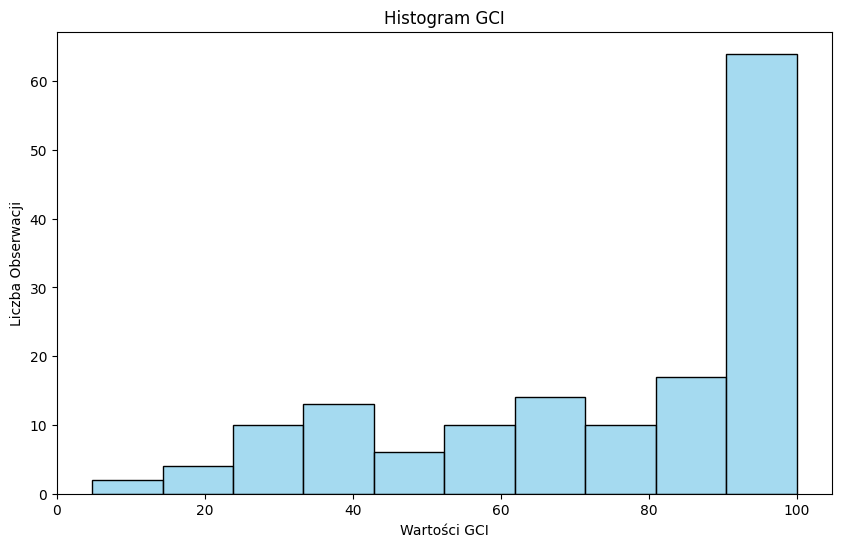

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

In [305]:
#HISTOGRAM ZMIENNEJ OBJAŚNIANEJ
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Wskaznik_cyberbezpieczenstwa'], bins=10, color='skyblue')
plt.title('Histogram GCI')
plt.xlabel('Wartości GCI')
plt.ylabel('Liczba Obserwacji')
plt.show()
plt

In [306]:
#podstawowe statystyki
df_final['Wskaznik_cyberbezpieczenstwa'].describe()

,Wskaznik_cyberbezpieczenstwa
count,150.000000
mean,74.132264
std,26.354593
min,4.757966
25%,56.412059
50%,84.850064
75%,96.992732
max,100.000000


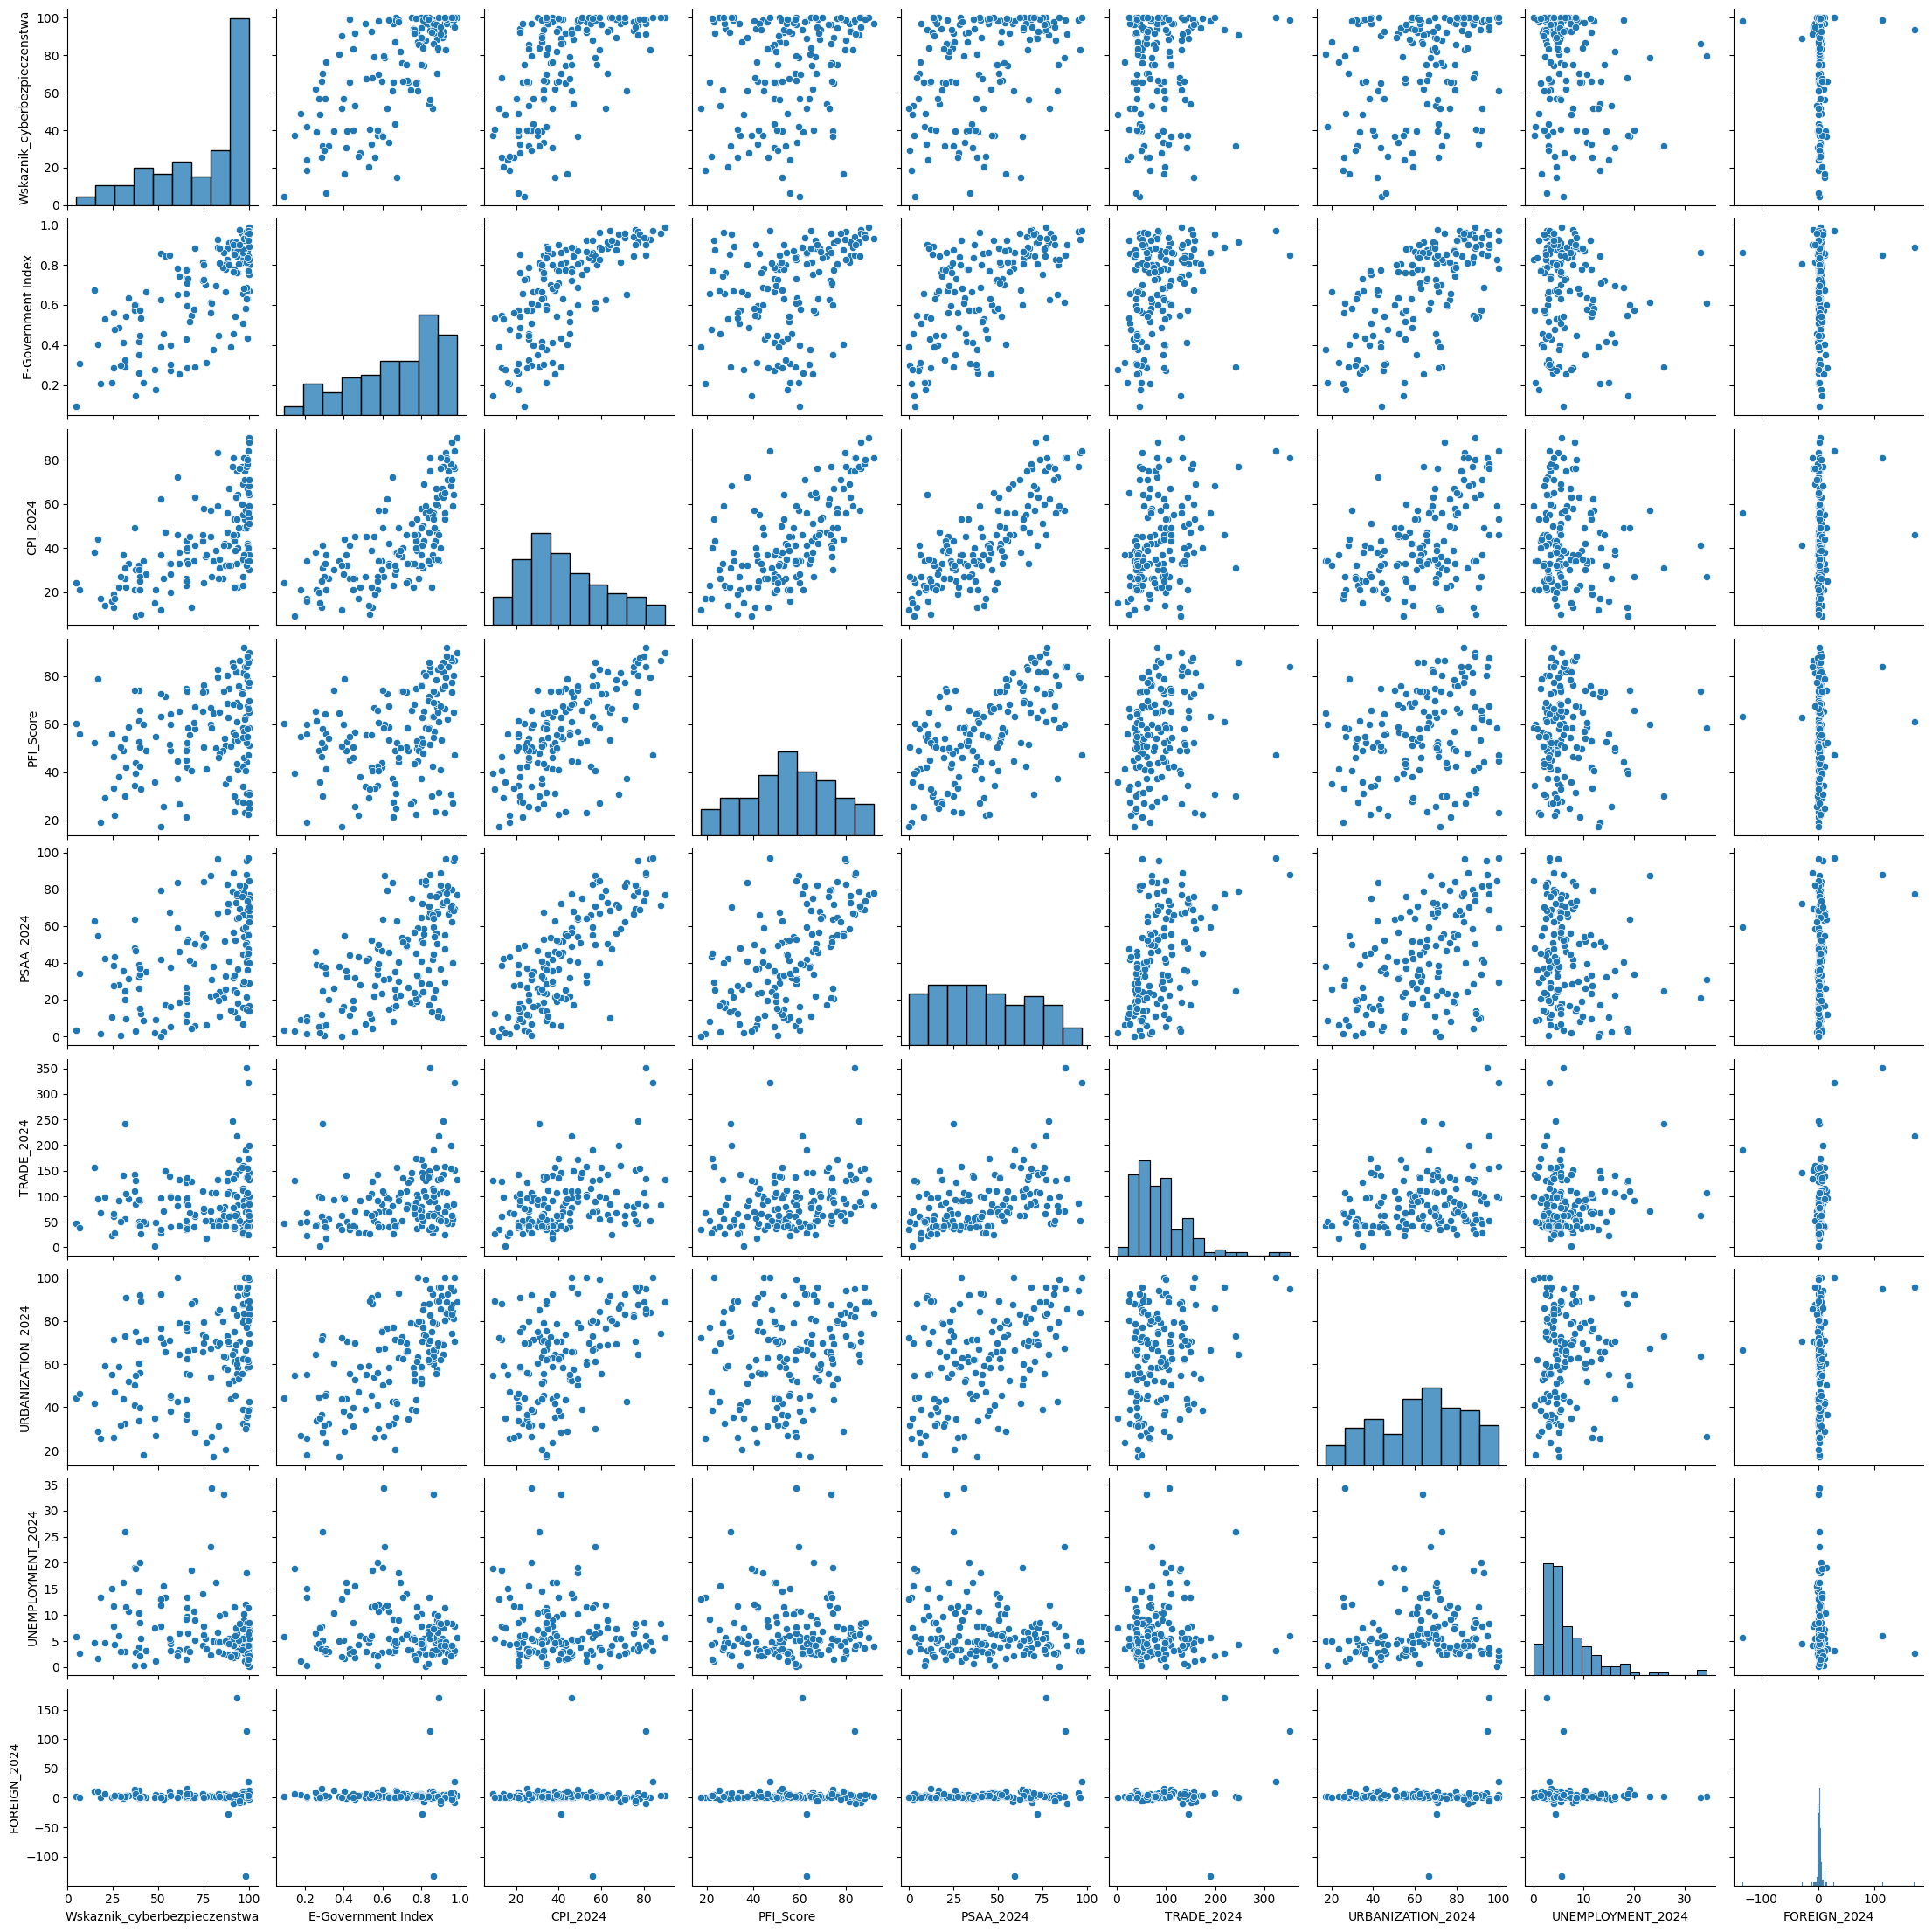

In [307]:
#analiza wszystkich korelacji na wykresie
sns.pairplot(df_final)

In [308]:
#analiza tylko z wskaźnikiem cyberbezpieczeństwa

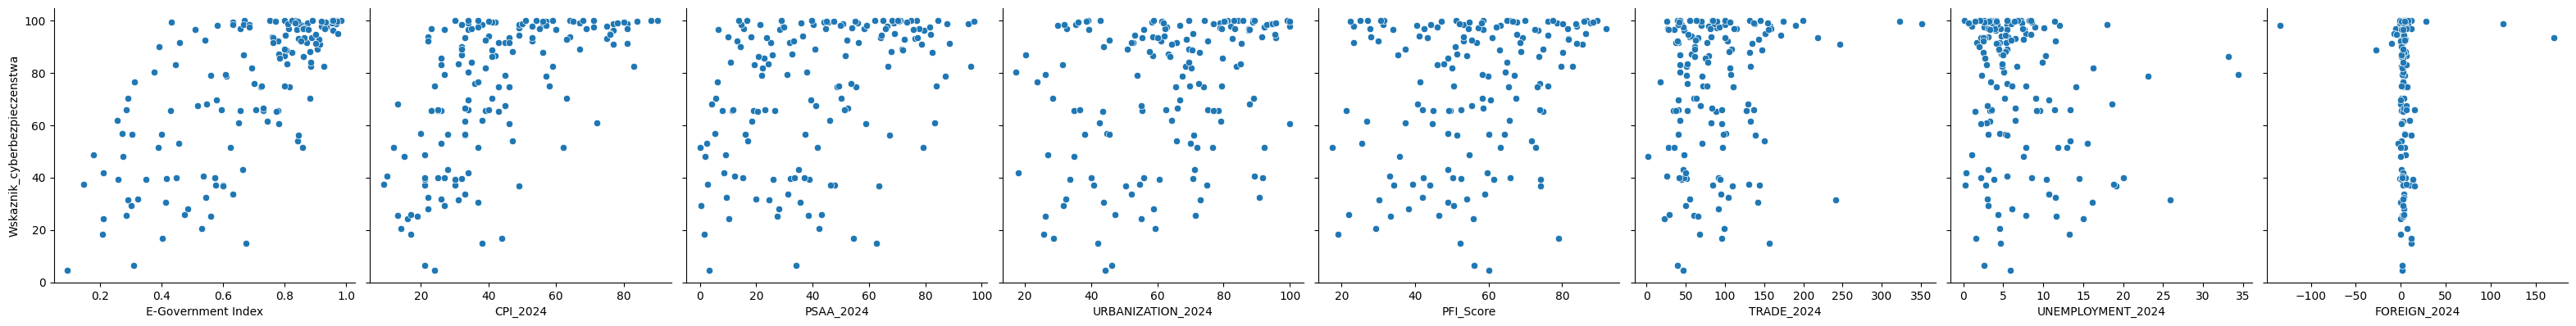

In [309]:
zmienne_korelacje = ['E-Government Index','CPI_2024','PSAA_2024','URBANIZATION_2024', 'PFI_Score', 'TRADE_2024', 'UNEMPLOYMENT_2024','FOREIGN_2024']
sns.pairplot(
    data=df_final,
    y_vars=['Wskaznik_cyberbezpieczenstwa'],
    x_vars=zmienne_korelacje,
    height=4,
)

In [310]:
#Ze wstępnej analizy wizalj porblematyczne mogą wydawać się inwestycje zagraniczne

In [311]:
#"Bliskość" do osi Y sugeruje mi użycie logarytmu GDP, Trade oraz Unemployment

<Axes: >

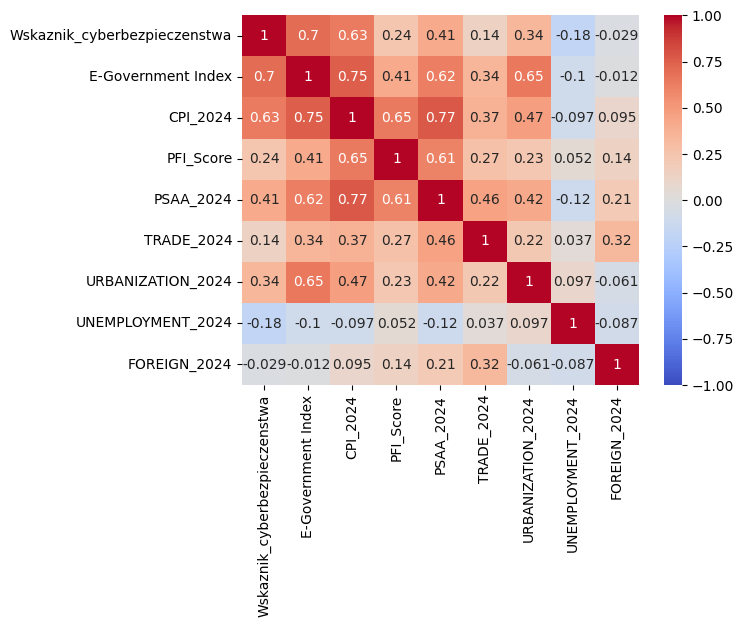

In [312]:
df_num = df_final.select_dtypes(include=['number'])
sns.heatmap(df_num.corr(method = 'spearman'), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')

In [365]:
#Dodaję TRADE i UNEMPLOYMENT jako zmienne zlogarytmowane
df_final['log_TRADE'] = np.log(df_final['TRADE_2024'])
df_final['log_UNEMPLOYMENT'] = np.log(df_final['UNEMPLOYMENT_2024'])

In [ ]:
#dodaję interakcję w celu przetestowania hipotezy dodatkowej

In [366]:
df_final

,Kraj,Wskaznik_cyberbezpieczenstwa,Kod_Kraju,E-Government Index,CPI_2024,PFI_Score,PSAA_2024,TRADE_2024,URBANIZATION_2024,UNEMPLOYMENT_2024,FOREIGN_2024,log_TRADE,log_UNEMPLOYMENT,residuals,predictions
0,Afghanistan,18.418647,AFG,0.20827,17,19.09,1.421801,67.584665,25.700735,13.295,0.000000,4.213381,2.587388,-23.725270,42.143917
1,Albania,86.506338,ALB,0.80000,42,54.10,51.658768,79.454636,58.546363,10.250,6.323495,4.375186,2.327278,4.049719,82.456619
2,Algeria,66.023846,DZA,0.59556,34,41.98,23.222750,40.134574,75.279291,11.427,0.455371,3.692238,2.435979,1.126332,64.897514
3,Angola,39.635885,AGO,0.41487,32,52.44,32.227489,50.842231,70.655138,14.464,-1.098688,3.928727,2.671663,-7.135110,46.770995
4,Argentina,51.525053,ARG,0.85733,37,63.13,41.706161,27.929761,92.274232,7.876,1.824095,3.329693,2.063820,-26.933477,78.458530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,89.200692,UZB,0.79990,32,37.27,40.758293,60.727440,50.998669,4.488,2.480479,4.106396,1.501407,7.226066,81.974626
162,"Venezuela, RB",40.498781,VEN,0.53603,10,33.06,12.322275,26.081166,89.285860,5.475,1.362724,3.261213,1.700192,-4.766706,45.265487
163,Viet Nam,99.740517,VNM,0.77092,40,22.31,45.023697,173.862025,38.490070,1.431,4.233942,5.158262,0.358374,13.460552,86.279965
165,Zambia,92.581628,ZMB,0.54237,39,55.38,52.132702,62.534887,45.470384,5.961,4.656003,4.135725,1.785238,30.398727,62.182900


#Model 1 - wszystkie zmienne

In [315]:

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [388]:
X = sm.add_constant(df_final[['E-Government Index','CPI_2024','PSAA_2024','PFI_Score','URBANIZATION_2024','log_TRADE','log_UNEMPLOYMENT','FOREIGN_2024']])
y = df_final['Wskaznik_cyberbezpieczenstwa']
model_1 = sm.OLS(y, X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Wskaznik_cyberbezpieczenstwa   R-squared:                       0.606
Model:                                      OLS   Adj. R-squared:                  0.583
Method:                           Least Squares   F-statistic:                     27.06
Date:                          Fri, 26 Dec 2025   Prob (F-statistic):           4.74e-25
Time:                                  21:37:49   Log-Likelihood:                -633.31
No. Observations:                           150   AIC:                             1285.
Df Residuals:                               141   BIC:                             1312.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 42.6399     11.161      3.820      0.000      20.575      64.705
E-Government Index    84.2893      9.949      8.472      0.000      64.621     103.958
CPI_2024               0.6519      0.145      4.502      0.000       0.366       0.938
PSAA_2024             -0.2743      0.097     -2.815      0.006      -0.467      -0.082
PFI_Score             -0.1064      0.108     -0.990      0.324      -0.319       0.106
URBANIZATION_2024     -0.2577      0.089     -2.904      0.004      -0.433      -0.082
log_TRADE             -3.8826      2.529     -1.535      0.127      -8.883       1.118
log_UNEMPLOYMENT      -1.8360      1.750     -1.049      0.296      -5.295       1.623
FOREIGN_2024           0.0486      0.070      0.694      0.489      -0.090       0.187
==============================================================================
Omnibus:                        5.833   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.709
Skew:                          -0.477   Prob(JB):                       0.0576
Kurtosis:                       3.041   Cond. No.                         906.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [389]:
#H0:Zmienne w modelu łącznie nieistotne
#H1:Zaprzeczenie H0
#p-value<0.05 --> odrzucam H0

#H0: Bi=0 ; i e [1;8]
#H1: Zaprzeczenie H0

#Zmienne istotne statystycznie: E-Goverment Index, CPI_2024, URBANIZATION_2024,PSAA_2024
#Zmienne nieistotne statystycznie: PFI,TRADE,UNEMPLOYMENT,FOREIGN

In [390]:
#TESTUJĘ HIPOTEZĘ O ŁĄCZNEJ NIEISTOTNOŚCI ZMIENNYCH PFI,TRADE,UNEMPLOYMENT,FOREIGN

In [391]:
#H0: B5=B6=B7=B8=0
#H1: Zaprzeczenie H0
hipoteza_H0 = "PFI_Score = 0, log_TRADE = 0, log_UNEMPLOYMENT = 0, FOREIGN_2024=0"
f_test_result = model_1.f_test(hipoteza_H0)
print(f_test_result)
#brak podstaw do odrzucenia H0

<F test: F=1.3620610659775871, p=0.25018151140487027, df_denom=141, df_num=4>


#MODEL 2 - zmienne tylko istotne statystycznie (wersja z e-gov)

In [392]:
X = sm.add_constant(df_final[['E-Government Index','CPI_2024','PSAA_2024','URBANIZATION_2024']])
y = df_final['Wskaznik_cyberbezpieczenstwa']
model_2 = sm.OLS(y, X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Wskaznik_cyberbezpieczenstwa   R-squared:                       0.590
Model:                                      OLS   Adj. R-squared:                  0.579
Method:                           Least Squares   F-statistic:                     52.24
Date:                          Fri, 26 Dec 2025   Prob (F-statistic):           3.48e-27
Time:                                  21:37:57   Log-Likelihood:                -636.15
No. Observations:                           150   AIC:                             1282.
Df Residuals:                               145   BIC:                             1297.
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 21.7039      4.897      4.432      0.000      12.026      31.382
E-Government Index    84.7780      9.738      8.705      0.000      65.530     104.026
CPI_2024               0.5954      0.132      4.503      0.000       0.334       0.857
PSAA_2024             -0.3172      0.091     -3.494      0.001      -0.497      -0.138
URBANIZATION_2024     -0.2680      0.087     -3.087      0.002      -0.440      -0.096
==============================================================================
Omnibus:                        6.583   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.245
Skew:                          -0.484   Prob(JB):                       0.0441
Kurtosis:                       3.246   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#USUWAM OBSERWACJE ODSTAJĄCE

In [ ]:
#DŹWIGNIA

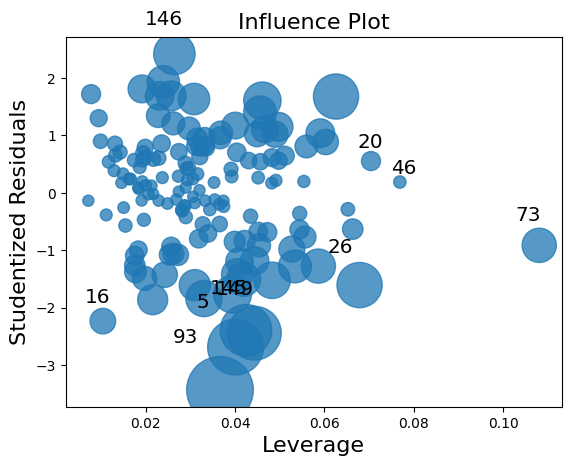

In [394]:
sm.graphics.influence_plot(model_2, criterion = 'Cooks')
plt.show()

In [395]:
h_lev = (2*len(model_2.params))/model_2.nobs
round(h_lev, 2)

0.07

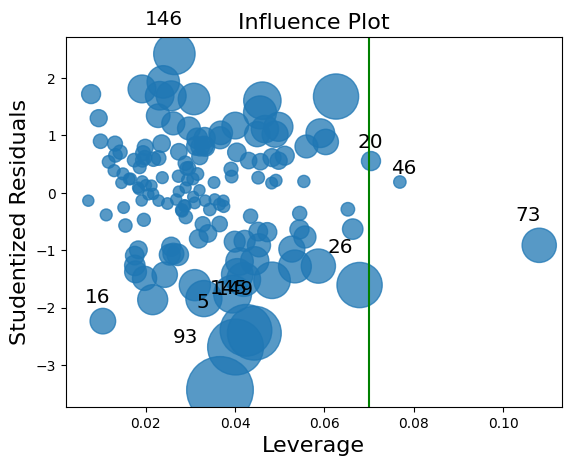

In [397]:
sm.graphics.influence_plot(model_2, criterion = 'Cooks')
plt.axvline(x = round(h_lev, 2), color = 'g')
plt.show()

In [398]:
#STANDARYZOWANE RESZTY

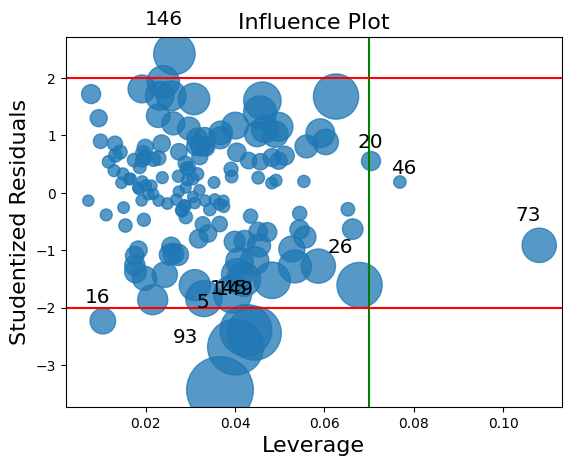

In [400]:
sm.graphics.influence_plot(model_2, criterion = 'Cooks')
plt.axvline(x = round(h_lev, 2), color = 'g')
plt.axhline(y = 2, color = 'r')
plt.axhline(y = -2, color = 'r')
plt.show()

In [401]:
#Odległość COOKA

In [403]:
df_final['cooks'] = model_2.get_influence().cooks_distance[0]

In [406]:
mean_cooks = df_final['cooks'].mean()

In [434]:
df_final[df_final['cooks']>4*mean_cooks].sort_values(by = 'cooks', ascending = False)

,Kraj,Wskaznik_cyberbezpieczenstwa,Kod_Kraju,E-Government Index,CPI_2024,PFI_Score,PSAA_2024,TRADE_2024,URBANIZATION_2024,UNEMPLOYMENT_2024,FOREIGN_2024,log_TRADE,log_UNEMPLOYMENT,residuals,predictions,EDGI_x_CPI,cooks
93,Maldives,14.819182,MDV,0.67453,38,52.36,62.559242,156.473956,41.998215,4.636,11.416720,5.052890,1.533852,NaN,4.136901,25.63214,0.083455
5,Armenia,53.958889,ARM,0.84217,47,71.60,17.061611,150.064727,65.811367,13.329,0.506878,5.011067,2.589942,NaN,4.695453,39.58199,0.057858
149,Timor-Leste,16.824355,TLS,0.40202,44,78.92,54.502369,95.448502,28.664107,1.603,11.556378,4.558587,0.471877,NaN,3.971557,17.68888,0.053605
145,Tajikistan,25.364818,TJK,0.56055,19,33.31,27.488152,65.634701,26.178806,11.635,2.050836,4.184105,2.454018,NaN,3.935366,10.65045,0.049252
26,Central African Republic,4.757966,CAF,0.09470,24,60.12,3.317536,46.431900,44.124356,5.899,1.468512,3.837987,1.774783,NaN,3.308925,2.27280,0.037189
55,"Gambia, The",61.732541,GMB,0.25517,38,65.53,45.971565,42.170617,64.299410,6.496,9.661863,3.741724,1.871187,NaN,3.599538,9.69646,0.037070
146,Tanzania,99.266562,TZA,0.43272,41,54.80,44.075829,41.513121,36.168446,2.576,2.178436,3.726010,0.946238,NaN,3.998329,17.74152,0.030738


In [ ]:
#MALEDIWY - bardzo niski poziom cyberbezpieczńśtwa przy przeciętnych wynikach
#Tanzania - odwrotnie - skrajnie wysoki GCI przy niskich wynikach
#Armenia - ZOSTAWIAM, wygląda na umiarkowany outlier
#

In [435]:
#DECYDUĘ O USUNIĘCIU TYCH ZMIENNYCH

In [436]:
df_clean=df_final.drop(df_final[df_final['cooks']>4*mean_cooks].index)

In [437]:
df_clean

,Kraj,Wskaznik_cyberbezpieczenstwa,Kod_Kraju,E-Government Index,CPI_2024,PFI_Score,PSAA_2024,TRADE_2024,URBANIZATION_2024,UNEMPLOYMENT_2024,FOREIGN_2024,log_TRADE,log_UNEMPLOYMENT,residuals,predictions,EDGI_x_CPI,cooks
0,Afghanistan,18.418647,AFG,0.20827,17,19.09,1.421801,67.584665,25.700735,13.295,0.000000,4.213381,2.587388,-25.694208,3.390371,3.54059,0.016938
1,Albania,86.506338,ALB,0.80000,42,54.10,51.658768,79.454636,58.546363,10.250,6.323495,4.375186,2.327278,1.728328,4.382297,33.60000,0.000189
2,Algeria,66.023846,DZA,0.59556,34,41.98,23.222750,40.134574,75.279291,11.427,0.455371,3.692238,2.435979,1.482736,4.134406,20.24904,0.000017
3,Angola,39.635885,AGO,0.41487,32,52.44,32.227489,50.842231,70.655138,14.464,-1.098688,3.928727,2.671663,-6.066358,3.773742,13.27584,0.001071
4,Argentina,51.525053,ARG,0.85733,37,63.13,41.706161,27.929761,92.274232,7.876,1.824095,3.329693,2.063820,-26.796808,4.385416,31.72121,0.016387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,89.200692,UZB,0.79990,32,37.27,40.758293,60.727440,50.998669,4.488,2.480479,4.106396,1.501407,3.904863,4.370097,25.59680,0.001127
162,"Venezuela, RB",40.498781,VEN,0.53603,10,33.06,12.322275,26.081166,89.285860,5.475,1.362724,3.261213,1.700192,-3.604464,3.660170,5.36030,0.001160
163,Viet Nam,99.740517,VNM,0.77092,40,22.31,45.023697,173.862025,38.490070,1.431,4.233942,5.158262,0.358374,9.503492,4.421260,30.83680,0.004425
165,Zambia,92.581628,ZMB,0.54237,39,55.38,52.132702,62.534887,45.470384,5.961,4.656003,4.135725,1.785238,28.553231,4.029328,21.15243,0.012610


In [438]:
#MODEL Z USUNIĘTYMI OBSERWACJAMI ODSTAJĄCYMI

In [439]:
X = sm.add_constant(df_clean[['E-Government Index','CPI_2024','PSAA_2024','URBANIZATION_2024']])
y = df_clean['Wskaznik_cyberbezpieczenstwa']
model_3 = sm.OLS(y, X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Wskaznik_cyberbezpieczenstwa   R-squared:                       0.651
Model:                                      OLS   Adj. R-squared:                  0.641
Method:                           Least Squares   F-statistic:                     64.41
Date:                          Fri, 26 Dec 2025   Prob (F-statistic):           1.26e-30
Time:                                  22:09:50   Log-Likelihood:                -586.71
No. Observations:                           143   AIC:                             1183.
Df Residuals:                               138   BIC:                             1198.
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 25.1608      4.516      5.571      0.000      16.231      34.091
E-Government Index    91.5684      9.107     10.055      0.000      73.561     109.575
CPI_2024               0.5587      0.118      4.738      0.000       0.326       0.792
PSAA_2024             -0.3138      0.082     -3.828      0.000      -0.476      -0.152
URBANIZATION_2024     -0.3568      0.079     -4.545      0.000      -0.512      -0.202
==============================================================================
Omnibus:                        2.841   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.874
Skew:                          -0.314   Prob(JB):                        0.238
Kurtosis:                       2.703   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#TESTY DIAGNOSTYCZNE

##Poprawność formy funkcyjnej

##GRAFICZNIE

In [440]:
df_clean['residuals'] = model_3.resid
df_clean['predictions']=model_3.predict()

<Axes: xlabel='predictions', ylabel='residuals'>

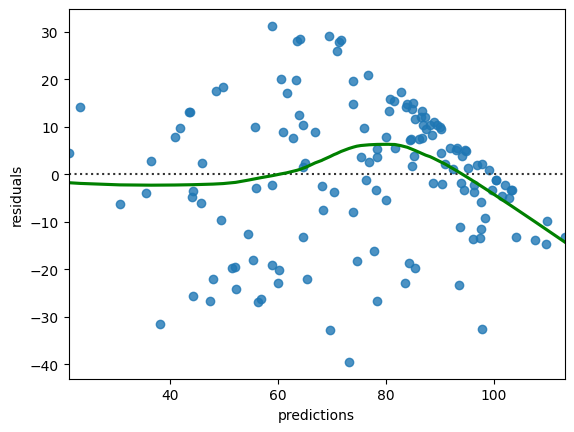

In [441]:
sns.residplot(data=df_clean, x = 'predictions' , y = 'residuals', lowess = True, line_kws = dict(color = 'g'))

In [442]:
#ZDECYDOWANIE NIE MA FORMY LINIOWEJ

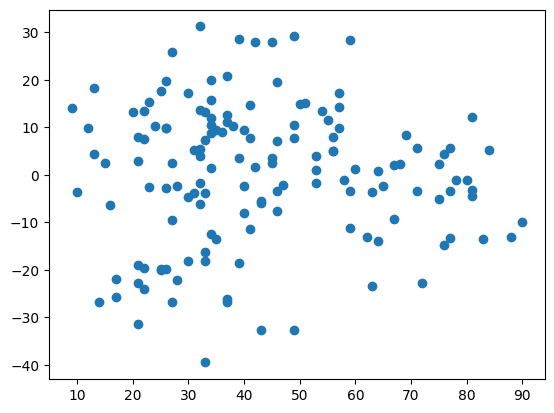

In [443]:
plt.scatter(df_clean['CPI_2024'], df_clean['residuals'])

In [444]:
#moim zdaniem najbardziej "podejrzana" zmienna

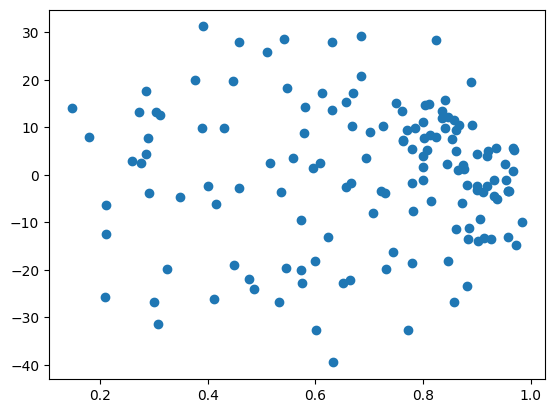

In [445]:
plt.scatter(df_clean['E-Government Index'], df_clean['residuals'])

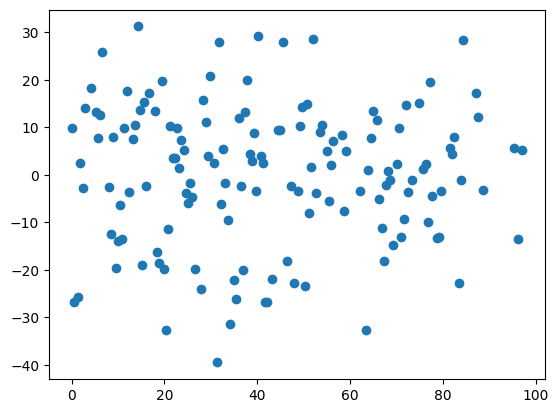

In [446]:
plt.scatter(df_clean['PSAA_2024'], df_clean['residuals'])

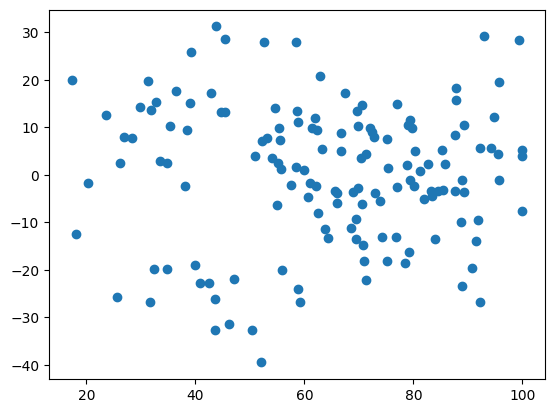

In [447]:


plt.scatter(df_clean['URBANIZATION_2024'], df_clean['residuals'])

##TEST RESET FITTED
#####H0:Forma funkcyjna modelu jest prawidłowa
#####H1:Zaprzeczenie H0

In [448]:
import statsmodels.stats.api as sms
sms.linear_reset(model_3, power = 2, test_type = 'fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=5.806450582702759, p-value=0.015967490480578495, df_denom=1>

In [449]:
#H0: Zależności między zmiennymi objaśniającymi a GCI jest liniowa

In [450]:
sms.linear_reset(model_3, power = 2, test_type = 'exog')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=10.154663834291348, p-value=0.037901440985223224, df_denom=4>

In [451]:
#Odrzucamy H0 i szukam metod na poprawienie formy funkcyjnej


#testy kwadratów, logarytmów i interakcji

In [452]:
#sprawdzam kwadratową CPI
df_kopia=df_clean.copy()
df_kopia['CPI_2024_SQ']=df_kopia['CPI_2024']*df_kopia['CPI_2024']
X_cpi_sq = sm.add_constant(df_kopia[['E-Government Index','CPI_2024','CPI_2024_SQ','PSAA_2024','URBANIZATION_2024']])
y = df_kopia['Wskaznik_cyberbezpieczenstwa']
model_cpi_sq = sm.OLS(y, X_cpi_sq).fit()
model_cpi_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Wskaznik_cyberbezpieczenstwa   R-squared:                       0.664
Model:                                      OLS   Adj. R-squared:                  0.651
Method:                           Least Squares   F-statistic:                     54.08
Date:                          Fri, 26 Dec 2025   Prob (F-statistic):           9.06e-31
Time:                                  22:09:58   Log-Likelihood:                -584.09
No. Observations:                           143   AIC:                             1180.
Df Residuals:                               137   BIC:                             1198.
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.0688      7.658      1.445      0.151      -4.074      26.212
E-Government Index    84.1108      9.561      8.797      0.000      65.205     103.017
CPI_2024               1.3119      0.353      3.719      0.000       0.614       2.010
CPI_2024_SQ           -0.0075      0.003     -2.261      0.025      -0.014      -0.001
PSAA_2024             -0.3127      0.081     -3.871      0.000      -0.472      -0.153
URBANIZATION_2024     -0.3035      0.081     -3.753      0.000      -0.463      -0.144
==============================================================================
Omnibus:                        4.142   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                4.207
Skew:                          -0.402   Prob(JB):                        0.122
Kurtosis:                       2.754   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [453]:
#możemy spodziewać się że CPI jest nieliniowa - jedak czy na pewno kwadratowa? Ujemny znak przy sq sugerowałby że CPI ma moment po którym lepsza percepcja kontroli korupcji w kraju spowalnia cyberbezpieczeńśtwo.

In [454]:
sms.linear_reset(model_cpi_sq, power = 2, test_type = 'fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=1.1685438161180848, p-value=0.27970064920241905, df_denom=1>

In [455]:
#wierchołek
b = model_cpi_sq.params['CPI_2024']
a = model_cpi_sq.params['CPI_2024_SQ']

wierzcholek = -b / (2 * a)
print(wierzcholek)

87.7006906469062


In [456]:
#Wynik sugeruje, że im lepsze CPI po osiągnięciu topowego poziomu 86, tym gorsze cyberbezpieczeństwo?

In [457]:
#Podejrzewam że logarytm też mógłby pomóc, więc stworzę dodatkowy model z logarytmem i zdecyduję który wybrać - jeśli logarytm również poprawiłby formę funkcyjną, interpretacja bedzie prostsza

In [458]:
!pip install Stargazer
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [460]:
df_kopia2=df_clean.copy()
df_kopia2['log_CPI']=np.log(df_kopia2['CPI_2024'])

In [462]:
X_cpi_log = sm.add_constant(df_kopia2[['E-Government Index','log_CPI','PSAA_2024','URBANIZATION_2024']])
y = df_kopia2['Wskaznik_cyberbezpieczenstwa']
model_cpi_log = sm.OLS(y, X_cpi_log).fit()
model_cpi_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Wskaznik_cyberbezpieczenstwa   R-squared:                       0.656
Model:                                      OLS   Adj. R-squared:                  0.646
Method:                           Least Squares   F-statistic:                     65.69
Date:                          Fri, 26 Dec 2025   Prob (F-statistic):           5.22e-31
Time:                                  22:11:41   Log-Likelihood:                -585.79
No. Observations:                           143   AIC:                             1182.
Df Residuals:                               138   BIC:                             1196.
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -33.1265     12.991     -2.550      0.012     -58.814      -7.439
E-Government Index    84.6886      9.591      8.830      0.000      65.725     103.652
log_CPI               22.3588      4.514      4.953      0.000      13.433      31.285
PSAA_2024             -0.2860      0.077     -3.721      0.000      -0.438      -0.134
URBANIZATION_2024     -0.2909      0.079     -3.687      0.000      -0.447      -0.135
==============================================================================
Omnibus:                        4.150   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                4.214
Skew:                          -0.401   Prob(JB):                        0.122
Kurtosis:                       2.747   Cond. No.                         946.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [561]:
sms.linear_reset(model_cpi_log, power = 2, test_type = 'fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.00435407795118696, p-value=0.9473894194422099, df_denom=1>

In [563]:
sms.linear_reset(model_cpi_log, power = 2, test_type = 'exog')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=4.598637920667476, p-value=0.33101125908662626, df_denom=4>

In [464]:
#Logarytmowanie również poprawiło formę funkcyjna

In [467]:
#Uznanie kwadratowej formy funkcyjnej oznaczałoby, że im kraj lepiej walczy z korupcją po osiągnięciu już bardzo dobrego poziomu, tym mniejszy będzie jego poziom cyberbezpieczeństwa - brzmi to nieintuicyjnie przez co problem złej formy funkcyjnej spróbuję najpierw rozwiązać logarytmowaniem CPI
#Mimo że na podstawie adj_R2 można uznać że kwadratowa zależność jest lepsza, różnica 0,004 jest bardzo mała a logarytmicznie malejące tempo wzrostu jest łatwiejsze do interpretacji niż zależność kwadratowa

In [ ]:
#TEST INTERAKCJI EDGIXCPI

In [479]:
df_clean['EDGI_x_CPI'] = df_clean['E-Government Index'] * df_clean['CPI_2024']
X_cpi_interakcja = sm.add_constant(df_clean[['E-Government Index','CPI_2024','PSAA_2024','URBANIZATION_2024','EDGI_x_CPI']])
y = df_clean['Wskaznik_cyberbezpieczenstwa']
model_cpi_interakcja = sm.OLS(y, X_cpi_interakcja).fit()
model_cpi_interakcja.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Wskaznik_cyberbezpieczenstwa   R-squared:                       0.660
Model:                                      OLS   Adj. R-squared:                  0.648
Method:                           Least Squares   F-statistic:                     53.19
Date:                          Fri, 26 Dec 2025   Prob (F-statistic):           1.92e-30
Time:                                  22:29:04   Log-Likelihood:                -584.88
No. Observations:                           143   AIC:                             1182.
Df Residuals:                               137   BIC:                             1200.
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.1550     10.558      0.678      0.499     -13.722      28.032
E-Government Index   110.4611     13.495      8.186      0.000      83.777     137.146
CPI_2024               1.1532      0.337      3.426      0.001       0.488       1.819
PSAA_2024             -0.3203      0.081     -3.939      0.000      -0.481      -0.160
URBANIZATION_2024     -0.3133      0.081     -3.861      0.000      -0.474      -0.153
EDGI_x_CPI            -0.7081      0.376     -1.883      0.062      -1.452       0.036
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.745
Skew:                          -0.430   Prob(JB):                       0.0932
Kurtosis:                       2.763   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [480]:
sms.linear_reset(model_cpi_interakcja, power = 2, test_type = 'fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.6867540480757549, p-value=0.4072706485403086, df_denom=1>

In [478]:

stargazer_comp = Stargazer([model_cpi_sq, model_cpi_log,model_cpi_interakcja])

stargazer_comp.rename_covariates({
    'const': 'Stała',
    'E-Government Index': 'E-Government Index',
    'PSAA_2024': 'Sojusze (PSAA)',
    'URBANIZATION_2024': 'Urbanizacja',
    'CPI_2024': 'Korupcja (liniowa)',
    'CPI_2024_SQ': 'Korupcja (kwadrat)',
    'log_CPI': 'Korupcja (logarytm)',
    'EDGI_x_CPI': 'E-Goverment Index x Korupcja'
})
HTML(stargazer_comp.render_html())

##Badam założenie o homoskedastyczności reszt
###TEST BREUCHA-PAGANA

##GRAFICZNIE

Text(0, 0.5, 'residuals')

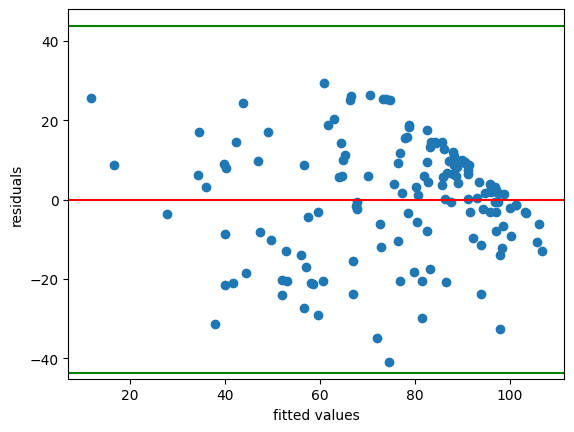

In [511]:
model_4=model_cpi_log
plt.scatter(model4.fittedvalues, model4.resid)
plt.axhline(y = 0, color = 'red')
plt.axhline(y = 0 + 3*model4.resid.std(), color = 'green')
plt.axhline(y = 0 - 3*model4.resid.std(), color = 'green')
plt.xlabel('fitted values')
plt.ylabel('residuals')

In [501]:
np.set_printoptions(legacy='1.25')
test1 = sms.het_breuschpagan(model4.resid, model4.model.exog)
test1

(14.918421917954424,
 0.004873440822510685,
 4.0184198530075435,
 0.004093763087444505)

In [502]:
from statsmodels.compat import lzip
nam1 = ['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

In [503]:
lzip(nam1, test1)

[('lagrange multiplier statistic', 14.918421917954424),
 ('p-value', 0.004873440822510685),
 ('f-value', 4.0184198530075435),
 ('f p-value', 0.004093763087444505)]

##TEST WHITE'A

In [504]:
test2 = sms.het_white(model4.resid, model4.model.exog)
test2
lzip(nam1, test2)

[('lagrange multiplier statistic', 28.41841762930851),
 ('p-value', 0.012513571680963915),
 ('f-value', 2.267602936135405),
 ('f p-value', 0.008522197297420459)]

In [505]:
#Odrzucam H0

#WAŻONA METODA NAJMNIEJSZYCH KWADRATÓW

In [513]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Wskaznik_cyberbezpieczenstwa   R-squared:                       0.656
Model:                                      OLS   Adj. R-squared:                  0.646
Method:                           Least Squares   F-statistic:                     65.69
Date:                          Fri, 26 Dec 2025   Prob (F-statistic):           5.22e-31
Time:                                  22:55:52   Log-Likelihood:                -585.79
No. Observations:                           143   AIC:                             1182.
Df Residuals:                               138   BIC:                             1196.
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -33.1265     12.991     -2.550      0.012     -58.814      -7.439
E-Government Index    84.6886      9.591      8.830      0.000      65.725     103.652
log_CPI               22.3588      4.514      4.953      0.000      13.433      31.285
PSAA_2024             -0.2860      0.077     -3.721      0.000      -0.438      -0.134
URBANIZATION_2024     -0.2909      0.079     -3.687      0.000      -0.447      -0.135
==============================================================================
Omnibus:                        4.150   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                4.214
Skew:                          -0.401   Prob(JB):                        0.122
Kurtosis:                       2.747   Cond. No.                         946.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [507]:
#Model regresji liniowej - model 4
#TEST BREUCHA PAGANA
sms.het_breuschpagan(model_4.resid, model_4.model.exog)

(14.918421917954424,
 0.004873440822510685,
 4.0184198530075435,
 0.004093763087444505)

In [508]:
#Szacujemy funkcję wariancji

In [525]:
df_clean['log_CPI'] = np.log(df_clean['CPI_2024'])
df_clean['log_reszt_sq'] = np.log(model_4.resid ** 2)

In [526]:
reg_fgls =smf.ols(formula='log_reszt_sq ~ Q("E-Government Index") + log_CPI + PSAA_2024 + URBANIZATION_2024',data=df_clean)


In [527]:
results_fgls = reg_fgls.fit()
results_fgls.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_reszt_sq   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     5.903
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           0.000205
Time:                        23:05:12   Log-Likelihood:                -304.58
No. Observations:                 143   AIC:                             619.2
Df Residuals:                     138   BIC:                             634.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   9.5689      1.818      5.263      0.000       5.974      13.164
Q("E-Government Index")    -1.8953      1.342     -1.412      0.160      -4.549       0.759
log_CPI                    -1.2039      0.632     -1.906      0.059      -2.453       0.045
PSAA_2024                   0.0052      0.011      0.484      0.629      -0.016       0.026
URBANIZATION_2024       -8.907e-06      0.011     -0.001      0.999      -0.022       0.022
==============================================================================
Omnibus:                       39.964   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.715
Skew:                          -1.292   Prob(JB):                     1.62e-16
Kurtosis:                       5.350   Cond. No.                         946.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [528]:
#Szacuję WLS

In [535]:
wls_weight = list(1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='Wskaznik_cyberbezpieczenstwa ~ Q("E-Government Index") + log_CPI + PSAA_2024 + URBANIZATION_2024', weights=wls_weight, data=df_clean)
results_wls = reg_wls.fit()
results_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                 
========================================================================================
Dep. Variable:     Wskaznik_cyberbezpieczenstwa   R-squared:                       0.545
Model:                                      WLS   Adj. R-squared:                  0.532
Method:                           Least Squares   F-statistic:                     41.39
Date:                          Fri, 26 Dec 2025   Prob (F-statistic):           9.22e-23
Time:                                  23:10:18   Log-Likelihood:                -577.25
No. Observations:                           143   AIC:                             1164.
Df Residuals:                               138   BIC:                             1179.
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -17.4420     13.849     -1.259      0.210     -44.826       9.942
Q("E-Government Index")    76.5257     10.036      7.625      0.000      56.682      96.369
log_CPI                    17.3544      4.815      3.604      0.000       7.833      26.876
PSAA_2024                  -0.1654      0.064     -2.596      0.010      -0.291      -0.039
URBANIZATION_2024          -0.2355      0.073     -3.207      0.002      -0.381      -0.090
==============================================================================
Omnibus:                        6.382   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.371
Skew:                          -0.517   Prob(JB):                       0.0414
Kurtosis:                       3.003   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [541]:
Stargazer([model_4, results_wls])

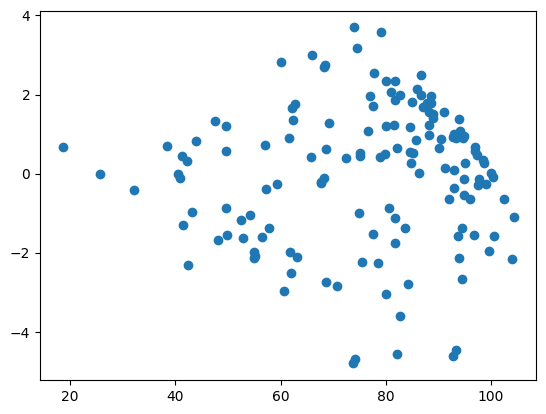

In [557]:
plt.scatter(results_wls.fittedvalues, results_wls.wresid)

# TEST NA NORMALNOSC SKLADNIKA LOSOWEGO

In [553]:
#GRAFICZNIE

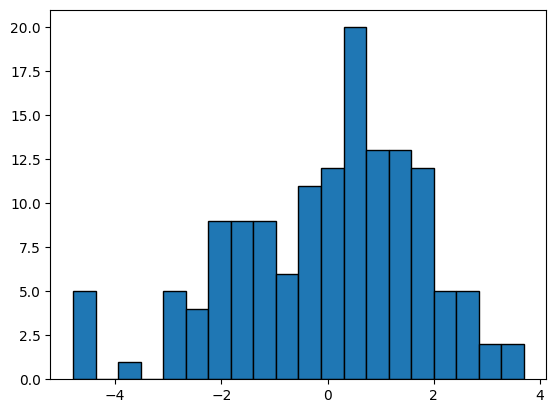

In [554]:
plt.hist(results_wls.wresid, bins = 20, edgecolor = 'black')
plt.show()

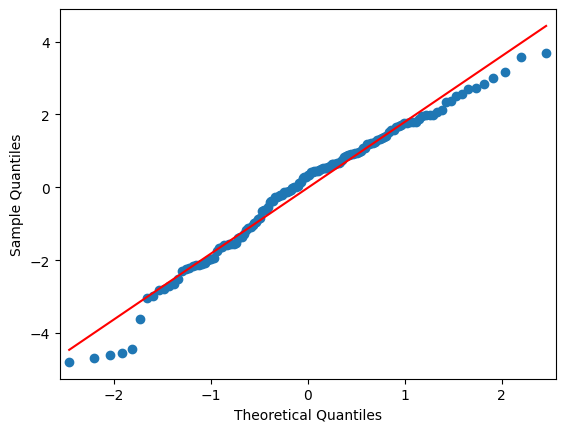

In [555]:
sm.qqplot(results_wls.wresid, line = 'r')
plt.show()

#TEST JACQUE-BERA
##H0:Składnik losowy ma rozkład normalny

In [556]:
test5 = sms.jarque_bera(results_wls.wresid)
nam2 = ['The Jarque-Bera test statistic', 'p-value', 'skewness', 'kurtosis']
lzip(nam2, test5)

[('The Jarque-Bera test statistic', 6.370643283270854),
 ('p-value', 0.04136493897444929),
 ('skewness', -0.5170078549113166),
 ('kurtosis', 3.0032225078406056)]

In [564]:
#ODRZUCAM H0, JEDNAK NA PODSTAWIE CTG - ROZKŁAD W DUŻEJ PRÓBIE BĘDZIE ZBIEGAŁ DO NORMALNEGO

#WSPÓŁLINIOWOŚĆ

In [568]:
import statsmodels.stats.outliers_influence as smo
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_clean[['E-Government Index', 'log_CPI', 'PSAA_2024', 'URBANIZATION_2024']]
X['intercept'] = 1.
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

              feature         VIF
0  E-Government Index    2.959200
1             log_CPI    3.181778
2           PSAA_2024    2.550860
3   URBANIZATION_2024    1.737252
4           intercept  110.038359


/tmp/ipython-input-2487428915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1.


In [ ]:
#ŻADNA ZMIENNA NIE WYMAGA USUNIĘCIA